In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
df = pd.read_csv("sim_data_full.csv")

In [3]:
from compute_costs import *

In [4]:
compute_costs(df)

C:\Users\joshsu\OneDrive - Bill & Melinda Gates Foundation\Code\malaria-sac-ipt\analysis\230503\compute_costs.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school["cost_IPTsc_drugs"] = df_school["iptsc_drugs_used_school"] * df_school["drug_type"].map(cost_dict)
C:\Users\joshsu\OneDrive - Bill & Melinda Gates Foundation\Code\malaria-sac-ipt\analysis\230503\compute_costs.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school["cost_IPTsc_consumables"] = df_school["cost_IPTsc_RDTs"] + df_schoo

In [5]:
df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

In [6]:
df_plot = df_pfpr[np.logical_and.reduce([
    df_pfpr["archetype"]=="Sahel",
    df_pfpr["transmission_level"]==0.2,
    np.in1d(df_pfpr["scenario_number"], [6,7,8,9,30,31,32,33])])]

In [44]:
df_itn = df_pfpr[np.logical_and.reduce([
    df_pfpr["archetype"]=="Sahel",
    df_pfpr["transmission_level"]==0.2,
    np.in1d(df_pfpr["scenario_number"], [5])])]

itn_implementation_cost = 1000/10
itn_system_cost = df_itn["cost_mean_IPTsc_only"].iloc[0]/10

In [45]:
itn_system_cost

3553.99905

In [33]:
df_base = df_pfpr[np.logical_and.reduce([
    df_pfpr["archetype"]=="Sahel",
    df_pfpr["transmission_level"]==0.2,
    np.in1d(df_pfpr["scenario_number"], [0])])]

base_cost = df_base["cost_mean_IPTsc_only"].iloc[0]

In [43]:
base_cost

36582.340249999994

In [8]:
color_dict = {
    6: "#5292C2",
    7: "#5292C2",
    8: "#F48420",
    9: "#F48420",
    5: "black",
    35: "#E9CA43",
    36: "#D61C5B"
}

In [13]:
df_plot.columns

Index(['archetype', 'baseline_transmission_metric', 'transmission_level',
       'scenario_number', 'iptsc_rdts_used', 'iptsc_drugs_used_school',
       'cases_treated', 'severe_cases_treated', 'received_smc_u5',
       'received_smc_5-10',
       ...
       'cost_severe', 'cost_ITNs', 'cost_ivermectin', 'cost_primaquine',
       'cost_low', 'cost_high', 'cost_mean', 'cost_low_IPTsc_only',
       'cost_high_IPTsc_only', 'cost_mean_IPTsc_only'],
      dtype='object', length=147)

In [10]:
# Plot implementation vs system cost

(0.0, 64227.448325)

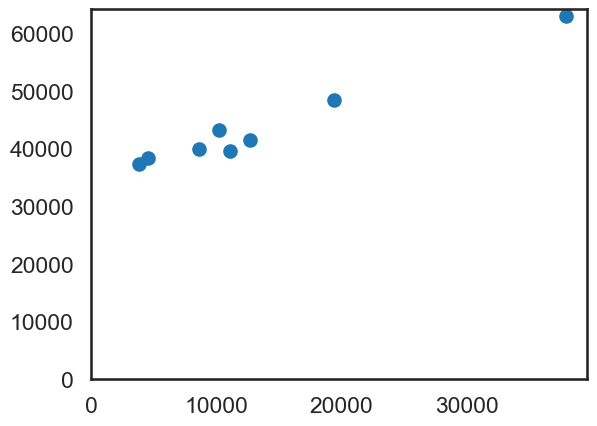

In [16]:
plt.scatter(df_plot["cost_IPTsc_mean"], df_plot["cost_mean_IPTsc_only"])
plt.xlim(left=0)
plt.ylim(bottom=0)

In [ ]:
baseline_cost = 

meta NOT subset; don't know how to subset; dropped


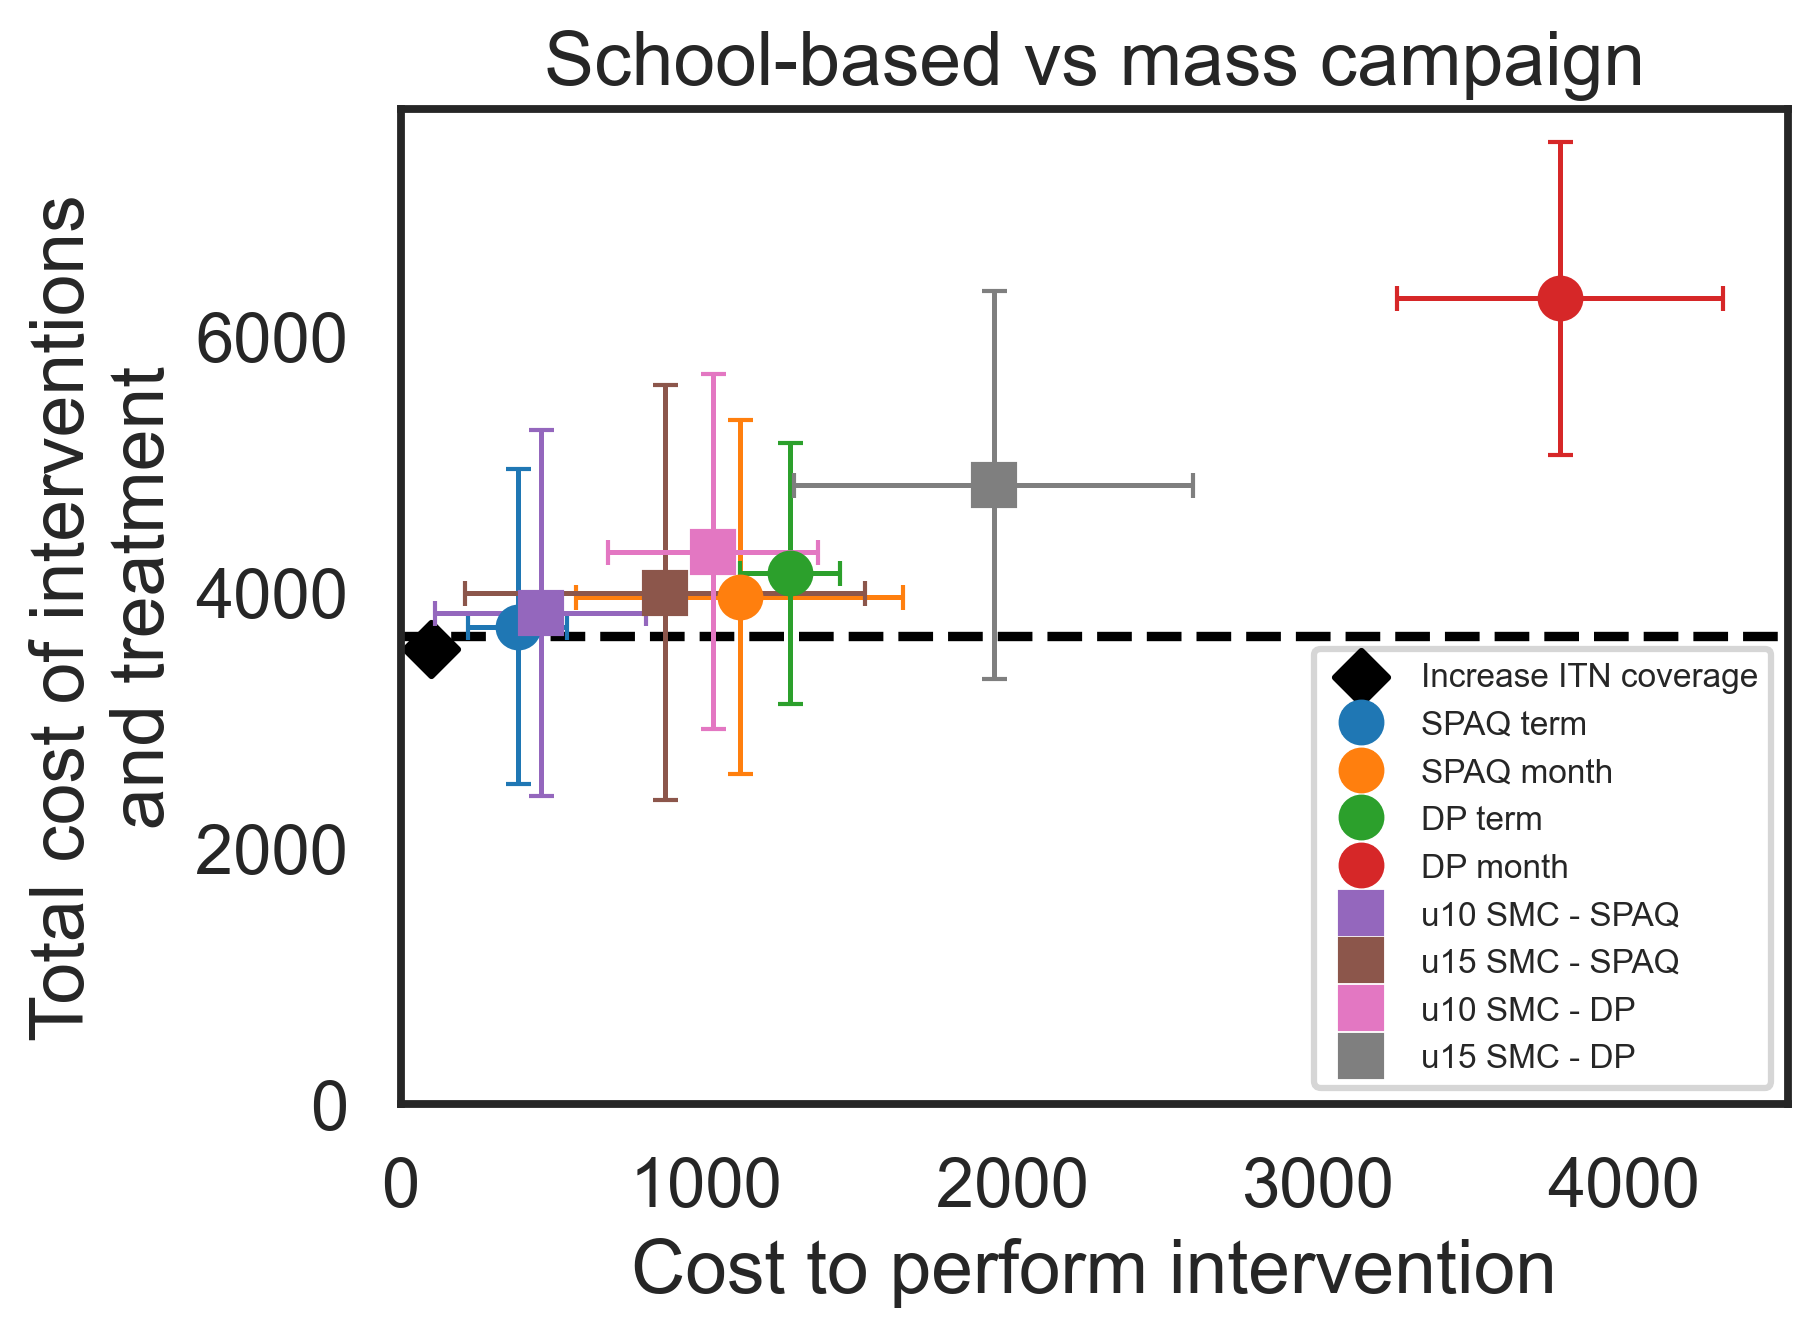

In [54]:
plt.figure(dpi=300)

plt.axhline(base_cost/10, color='black', linestyle='dashed')
plt.scatter(itn_implementation_cost, itn_system_cost, color='black', marker='D', label="Increase ITN coverage")


for i, sdf in df_plot.groupby("scenario_number"):
    label = sdf["comments"].iloc[0]
    system_cost = sdf["cost_mean_IPTsc_only"]/10
    provider_cost = sdf["cost_IPTsc_mean"]/10
    xerr = (sdf["cost_IPTsc_high"]-sdf["cost_IPTsc_mean"])/10
    yerr = (sdf["cost_high_IPTsc_only"]-sdf["cost_mean_IPTsc_only"])/10
    
    if i <= 9:
        marker = "o"
    else:
        marker = "s"
    plt.errorbar(provider_cost, system_cost, 
                 yerr=yerr, 
                 xerr=xerr,
                 label=label,
                 fmt=marker, capsize=3, elinewidth=1.2, errorevery=1, markersize=10)
    plt.xlabel("Cost to perform intervention")
    plt.ylabel("Total cost of interventions \n and treatment")
    
plt.legend(fontsize=8)
plt.xlim(left=0)
plt.ylim(bottom=0)
# plt.ylim([0,20])

plt.title("School-based vs mass campaign")
plt.tight_layout()

plt.savefig("school_vs_mass_panelC.pdf")
plt.savefig("school_vs_mass_panelC.png")
